# Point Source in an Infinite Medium

We are considering now a Point Source in an infinite medium, emitting $S_0$ $[\frac{n°neutrons}{cm^2 sec}]$ isotropically. Since we are in spherical coordinates (considering variable r as the radius with r>0), the Source S(r) can be expressed with $4πr^{2}$ as normalization factor:

\begin{equation}
  S(r) = \frac{S_0}{4π r^{2}} \delta(r)
\end{equation}

The complete equation for $r>=0$ is:

\begin{equation}
  \frac{1}{r^{2}} \frac{d}{dr} r^{2} \frac{d\phi(r)}{dr} - 
  \frac{\phi(r)}{L^{2}} = S(r)
\end{equation}

For $r>0$ we have the *HOMOGENEOUS EQUATION*:

\begin{equation}
  \frac{1}{r^{2}} \frac{d}{dr} r^{2} \frac{d\phi(r)}{dr} - 
  \frac{\phi(r)}{L^{2}} = 0
\end{equation}

To solve the problem easily we invoke a new function $\psi$ such that:

\begin{equation}
  \phi = \frac{\psi}{r}
\end{equation}

In such a way the above equation becomes:

\begin{equation}
  \frac{d^{2}\psi(r)}{dr^{2}} - \frac{\psi(r)}{L^{2}} = rS(r)
\end{equation}

*BOUNDARY CONDITIONS:*

(a)

\begin{aligned}
  &\lim_{r\rightarrow 0} 4 \pi r^{2} J(r) = S_0 \\
  &\lim_{r\rightarrow 0} -4 \pi r^{2} D \frac{d\phi}{dr}  = S_0
\end{aligned}

(b)

\begin{aligned}
  &\lim_{r \rightarrow \infty} \phi(r) < \infty \\
  &\lim_{r \rightarrow \infty} \frac{\psi(r)}{r} < \infty 
\end{aligned}

The expected form of the *HOMOGENEOUS SOLUTION* should be:

\begin{equation}
  \phi(r) = C_1\frac{e^{(-\frac{r}{L})}}{r} + C_2\frac{e^{(\frac{r}{L})}}{r}
\end{equation}

By applying all the BCs we should obtain the *FINAL SOLUTION*:

\begin{equation}
  \phi(r) = S_0\frac{e^{(-\frac{r}{L})}}{4 \pi r D}
\end{equation}

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

#variables and functions

r = sp.Symbol("r")
Sigma_a, D, L = sp.symbols("Sigma_a, D, L")
So = sp.Symbol("S_0")

Phi, Psi, S = sp.symbols("Phi, Psi, S", cls=sp.Function)

C1, C2 = sp.symbols("C1, C2")

In [ ]:
#Source
Source = sp.Eq(S(r), (So/(4*sp.pi*(r**2))*sp.DiracDelta(r)))
print("Isotropic Source definition: ")
Source

Isotropic Source definition: 


Eq(S(r), S_0*DiracDelta(r)/(4*pi*r**2))

In [ ]:
#Equation in Psi
Psi_Equation = sp.Eq(Psi(r).diff(r,2)-(Psi(r)/(L**2)), r*Source.rhs)
print("Complete equation in Psi: ")
Psi_Equation

Complete equation in Psi: 


Eq(Derivative(Psi(r), (r, 2)) - Psi(r)/L**2, S_0*DiracDelta(r)/(4*pi*r))

In [ ]:
#Solution for the Homogeneous Equation in Psi
Psi_Homo = sp.Eq(Psi(r).diff(r,2)-(Psi(r)/(L**2)),0)
Psi_Homo_Solution = sp.dsolve(Psi_Homo, Psi(r))
print("Solution for the Homogeneous Equation in Psi:")
Psi_Homo_Solution

Solution for the Homogeneous Equation in Psi:


Eq(Psi(r), C1*exp(-r/L) + C2*exp(r/L))

In [ ]:
#Condition on C2 to respect the BC (b), 'cause sympy cannot manage the integral of convergence
Psi_Homo_Solution_C2 = Psi_Homo_Solution.subs({C2:0})
print("BC to impose the flux as bounded (C2=0): ")
Psi_Homo_Solution_C2

BC to impose the flux as bounded (C2=0): 


Eq(Psi(r), C1*exp(-r/L))

In [ ]:
#Moving to Phi
Phi_Solution_C2 = Psi_Homo_Solution_C2.subs({Psi(r):Phi(r),C1:C1/r})
print("Solution expressed in term of flux Phi: ")
Phi_Solution_C2

Solution expressed in term of flux Phi: 


Eq(Phi(r), C1*exp(-r/L)/r)

In [ ]:
#Imposition of the (a) Boundary condition

argument = sp.Eq(-4 * sp.pi * (r**2) * D * Phi_Solution_C2.rhs.diff(r),0)       #argument of the limit

Limit_Equation = sp.Eq(sp.limit(argument.lhs,r,0),So)                           #solution of the limit equal to the So

C1_Solution = sp.solve(Limit_Equation, C1)[0]                                   #we have to use solve for algebric solution on C1 and extract the expression out of the array
print("Solution for C1: ")
sp.Eq(C1,C1_Solution)

Solution for C1: 


Eq(C1, S_0/(4*pi*D))

In [ ]:
#Final Solution for the Flux Phi
Phi_Final_Solution = Phi_Solution_C2.subs({C1:C1_Solution})
print("Final Solution for the Flux Phi: ")
Phi_Final_Solution

Final Solution for the Flux Phi: 


Eq(Phi(r), S_0*exp(-r/L)/(4*pi*D*r))

Text(0, 0.5, '#n/cm2 sec')

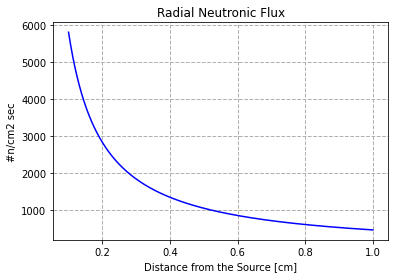

In [ ]:
#plotting the function of Flux
Sigma_t = 0.25
Sigma_s = 0.15
Sigma_a_val = Sigma_t - Sigma_s

D_val = 1/(3*Sigma_t)
So_val = 10**4
L_val = sp.sqrt(D_val/Sigma_a_val).evalf()

distance = np.linspace(0.1, 1, 1000)

Phi_Final_Discrete1 = Phi_Final_Solution.subs({D:D_val, So:So_val, L:L_val})
Phi_Final_Discrete2 = sp.lambdify(r,Phi_Final_Discrete1.rhs,"numpy")
Phi_Final_Discrete3 = Phi_Final_Discrete2(distance)

plt.plot(distance, Phi_Final_Discrete3, "blue")
plt.title('Radial Neutronic Flux')
plt.grid("gray", linestyle="--", linewidth=1)
plt.xlabel('Distance from the Source [cm]')
plt.ylabel('#n/cm2 sec')

Text(0.5, 0, 'Phi(x,y)')

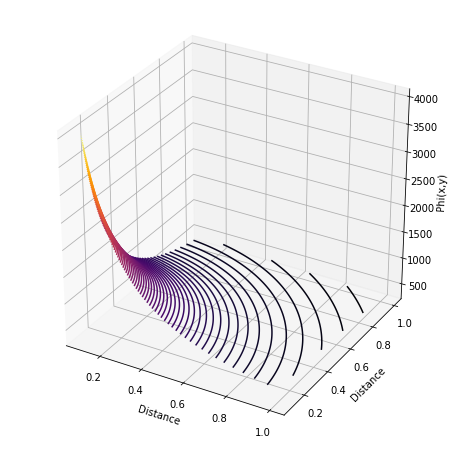

In [ ]:
#3D plot (contour3D)
x, y = sp.symbols("x, y")
r2 = sp.sqrt(x**2 + y**2)

Phi_Final_Solution_cart1 = Phi_Final_Discrete1.subs({r:r2}).rhs

X1 = np.linspace(0.1,1,1000)
Y1 = np.linspace(0.1,1,1000)
X2,Y2 = np.meshgrid(X1,Y1)

Phi_Final_Solution_cart2 = sp.lambdify((x,y), Phi_Final_Solution_cart1, "numpy")
Phi_Final_Solution_cart3 = Phi_Final_Solution_cart2(X2,Y2)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.contour3D(X2,Y2,Phi_Final_Solution_cart3,100,cmap='inferno')
ax.set_xlabel("Distance")
ax.set_ylabel("Distance")
ax.set_zlabel("Phi(x,y)")

Text(0.5, 0, 'Phi(x,y)')

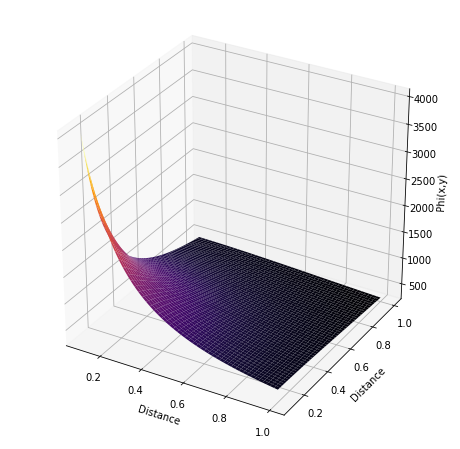

In [ ]:
#3D plot (gca - surf)

fig = plt.figure(figsize=(8,8))
ax = plt.gca(projection='3d')
surf = ax.plot_surface(X2,Y2,Phi_Final_Solution_cart3,cmap='inferno')
ax.set_xlabel("Distance")
ax.set_ylabel("Distance")
ax.set_zlabel("Phi(x,y)")